In [1]:
import wikipedia
import numpy as np
import matplotlib.pyplot as plt

# Search forChildrens Authors
First we'll search for the term childrens author and see if there is a good starting page

In [2]:
result = wikipedia.search('Childrens Author')

Result shows that the first page is childrens literature, then a bunch of authors. Lets pull the childrens literature page and see if we can use it as a starting point

In [5]:
result

["Children's literature",
 'Sam Angus (writer)',
 "Alvin Schwartz (children's author)",
 'Author! Author! (film)',
 "Douglas Evans (children's author)",
 "Ruth White (children's author)",
 'Alicia Previn',
 "Al Perkins (children's author)",
 'Plymouth Marjon University',
 "Margaret Mayo (children's author)"]

In [6]:
lit = wikipedia.page("Children's literature")

We can see what other pages the _Children's literature_ page has in it by checking out links. Conveniently these are the names of wikipedia pages.

In [7]:
lit.links[1:15]

['ALA Editions',
 'A Book of Giants',
 'A Little Pretty Pocket-Book',
 'Abanindranath Tagore',
 'Acronym and initialism',
 'Adventure book',
 'Adventurer',
 'Africa',
 'African American',
 'After the First Death',
 'Alan Garner',
 'Aleksandr Afanasyev',
 'Alex Rider',
 'Alexander Belyayev']

In [8]:
print(len(lit.links))

698


## Let The Scraping Begin!
Now that we have a list of pages that will get us what we want, we'll try to scrap all the content.
Scraping can introduce a burden on the website we are scraping. If you hit the website with too many requests in too short a time, it can cause websites slowdowns. We'll set the rate limit here so there is a breif pause before it tries to grab the data.

In [9]:
%%time
wikipedia.set_rate_limiting(True)

Wall time: 0 ns


698 pages should fit into memory pretty easily. if you are scraping a bunch, you'll need to periodically write the results to disk so you don't run out of memory.

In [14]:
bunchOfPages = []
exceptionCount = 0
for p in lit.links:
    try: 
        bunchOfPages.append(wikipedia.page(p).content)
    except:
        exceptionCount+=1



C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [15]:
len(bunchOfPages)

690

In [17]:
import json
with open('childrensAuthorContent.json', 'w') as outfile:
    json.dump(bunchOfPages, outfile)

In [23]:
with open('childrensAuthorContent.json') as infile:
    loaded = json.load(infile)

In [27]:
lengths = [len(article.split(' ')) for article in bunchOfPages]

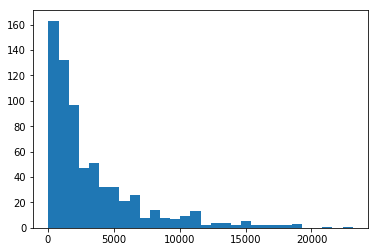

In [35]:
p = plt.hist(lengths, bins = 30)

In [36]:
import spacy

ModuleNotFoundError: No module named 'spacy'